In [14]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torch.optim as optim
import os
from PIL import Image
from tqdm import tqdm

# Configuration
NUM_CLASSES = 2
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 20
BATCH_SIZE = 8
LR = 0.001
MODEL_SAVE_PATH = './model'

# Create save directory
os.makedirs(MODEL_SAVE_PATH, exist_ok=True)

# Dataset Preparation
images_dir = './MaskedImages'
masks_dir = './NewMask'

class CustomDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        mask = Image.open(self.mask_paths[idx]).convert("L")

        if self.transform:
            image = self.transform(image)
            mask = transforms.Resize((128, 128))(mask)
            mask = transforms.ToTensor()(mask).squeeze(0).long()

        return image, mask

# Model Setup
model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=False)
model.classifier[4] = nn.Conv2d(256, NUM_CLASSES, kernel_size=1)
model = model.to(DEVICE)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

# Training Function
def train_model(model, train_loader):
    model.train()
    for epoch in range(EPOCHS):
        running_loss = 0.0
        print(f"\nEpoch [{epoch+1}/{EPOCHS}]")
        for images, masks in tqdm(train_loader):
            images, masks = images.to(DEVICE), masks.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(images)['out']
            outputs = nn.functional.interpolate(outputs, size=masks.shape[1:], mode='bilinear', align_corners=False)

            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{EPOCHS}] - Average Loss: {running_loss / len(train_loader):.4f}")

# Data Loading
from glob import glob

train_images = sorted(glob(images_dir + '/*.png'))
train_masks = sorted(glob(masks_dir + '/*.png'))

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

train_dataset = CustomDataset(train_images, train_masks, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Training
train_model(model, train_loader)

# Save Final Model
torch.save(model.state_dict(), os.path.join(MODEL_SAVE_PATH, "deeplabv3_final.pth"))
print("\nTraining Complete. Model Saved.")


Epoch [1/20]


100%|██████████| 57/57 [13:01<00:00, 13.71s/it]


Epoch [1/20] - Average Loss: 0.1929

Epoch [2/20]


100%|██████████| 57/57 [13:38<00:00, 14.36s/it]


Epoch [2/20] - Average Loss: 0.0714

Epoch [3/20]


100%|██████████| 57/57 [12:49<00:00, 13.50s/it]


Epoch [3/20] - Average Loss: 0.0670

Epoch [4/20]


100%|██████████| 57/57 [11:48<00:00, 12.43s/it]


Epoch [4/20] - Average Loss: 0.0648

Epoch [5/20]


100%|██████████| 57/57 [11:23<00:00, 11.98s/it]


Epoch [5/20] - Average Loss: 0.0637

Epoch [6/20]


100%|██████████| 57/57 [11:14<00:00, 11.84s/it]


Epoch [6/20] - Average Loss: 0.0620

Epoch [7/20]


100%|██████████| 57/57 [10:10<00:00, 10.71s/it]


Epoch [7/20] - Average Loss: 0.0620

Epoch [8/20]


100%|██████████| 57/57 [09:54<00:00, 10.42s/it]


Epoch [8/20] - Average Loss: 0.0610

Epoch [9/20]


100%|██████████| 57/57 [09:47<00:00, 10.31s/it]


Epoch [9/20] - Average Loss: 0.0610

Epoch [10/20]


100%|██████████| 57/57 [08:09<00:00,  8.58s/it]


Epoch [10/20] - Average Loss: 0.0607

Epoch [11/20]


100%|██████████| 57/57 [07:38<00:00,  8.04s/it]


Epoch [11/20] - Average Loss: 0.0597

Epoch [12/20]


100%|██████████| 57/57 [07:55<00:00,  8.35s/it]


Epoch [12/20] - Average Loss: 0.0601

Epoch [13/20]


100%|██████████| 57/57 [07:52<00:00,  8.30s/it]


Epoch [13/20] - Average Loss: 0.0595

Epoch [14/20]


100%|██████████| 57/57 [07:45<00:00,  8.17s/it]


Epoch [14/20] - Average Loss: 0.0591

Epoch [15/20]


100%|██████████| 57/57 [07:49<00:00,  8.24s/it]


Epoch [15/20] - Average Loss: 0.0591

Epoch [16/20]


100%|██████████| 57/57 [07:42<00:00,  8.11s/it]


Epoch [16/20] - Average Loss: 0.0588

Epoch [17/20]


100%|██████████| 57/57 [07:48<00:00,  8.21s/it]


Epoch [17/20] - Average Loss: 0.0590

Epoch [18/20]


100%|██████████| 57/57 [07:46<00:00,  8.19s/it]


Epoch [18/20] - Average Loss: 0.0587

Epoch [19/20]


100%|██████████| 57/57 [07:41<00:00,  8.10s/it]


Epoch [19/20] - Average Loss: 0.0585

Epoch [20/20]


100%|██████████| 57/57 [07:43<00:00,  8.13s/it]


Epoch [20/20] - Average Loss: 0.0586

Training Complete. Model Saved.


In [ ]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torch.optim as optim
import os
from PIL import Image
from tqdm import tqdm

# Configuration
NUM_CLASSES = 2
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 40
BATCH_SIZE = 8
LR = 0.001
MODEL_SAVE_PATH = './model'

# Create save directory
os.makedirs(MODEL_SAVE_PATH, exist_ok=True)

# Dataset Preparation
images_dir = './MaskedImages'
masks_dir = './NewMask'

class CustomDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        mask = Image.open(self.mask_paths[idx]).convert("L")

        if self.transform:
            image = self.transform(image)
            mask = transforms.Resize((128, 128))(mask)
            mask = transforms.ToTensor()(mask).squeeze(0).long()

        return image, mask

# Model Setup
model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=False)
model.classifier[4] = nn.Conv2d(256, NUM_CLASSES, kernel_size=1)
model = model.to(DEVICE)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

# Training Function
def train_model(model, train_loader):
    model.train()
    for epoch in range(EPOCHS):
        running_loss = 0.0
        print(f"\nEpoch [{epoch+1}/{EPOCHS}]")
        for images, masks in tqdm(train_loader):
            images, masks = images.to(DEVICE), masks.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(images)['out']
            outputs = nn.functional.interpolate(outputs, size=masks.shape[1:], mode='bilinear', align_corners=False)

            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{EPOCHS}] - Average Loss: {running_loss / len(train_loader):.4f}")

# Data Loading
from glob import glob

train_images = sorted(glob(images_dir + '/*.png'))
train_masks = sorted(glob(masks_dir + '/*.png'))

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

train_dataset = CustomDataset(train_images, train_masks, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Training
train_model(model, train_loader)

# Save Final Model
torch.save(model.state_dict(), os.path.join(MODEL_SAVE_PATH, "deeplabv3_final_new.pth"))
print("\nTraining Complete. Model Saved.")


Epoch [1/40]


100%|██████████| 57/57 [13:29<00:00, 14.20s/it]


Epoch [1/40] - Average Loss: 0.1271

Epoch [2/40]


100%|██████████| 57/57 [12:25<00:00, 13.08s/it]


Epoch [2/40] - Average Loss: 0.0664

Epoch [3/40]


100%|██████████| 57/57 [11:32<00:00, 12.15s/it]


Epoch [3/40] - Average Loss: 0.0639

Epoch [4/40]


100%|██████████| 57/57 [11:29<00:00, 12.10s/it]


Epoch [4/40] - Average Loss: 0.0627

Epoch [5/40]


100%|██████████| 57/57 [11:00<00:00, 11.58s/it]


Epoch [5/40] - Average Loss: 0.0621

Epoch [6/40]


100%|██████████| 57/57 [10:58<00:00, 11.55s/it]


Epoch [6/40] - Average Loss: 0.0615

Epoch [7/40]


100%|██████████| 57/57 [10:57<00:00, 11.54s/it]


Epoch [7/40] - Average Loss: 0.0606

Epoch [8/40]


100%|██████████| 57/57 [11:01<00:00, 11.60s/it]


Epoch [8/40] - Average Loss: 0.0603

Epoch [9/40]


100%|██████████| 57/57 [11:29<00:00, 12.10s/it]


Epoch [9/40] - Average Loss: 0.0599

Epoch [10/40]


100%|██████████| 57/57 [11:07<00:00, 11.72s/it]


Epoch [10/40] - Average Loss: 0.0597

Epoch [11/40]


100%|██████████| 57/57 [11:14<00:00, 11.83s/it]


Epoch [11/40] - Average Loss: 0.0590

Epoch [12/40]


100%|██████████| 57/57 [11:15<00:00, 11.85s/it]


Epoch [12/40] - Average Loss: 0.0596

Epoch [13/40]


100%|██████████| 57/57 [11:10<00:00, 11.77s/it]


Epoch [13/40] - Average Loss: 0.0593

Epoch [14/40]


100%|██████████| 57/57 [11:17<00:00, 11.89s/it]


Epoch [14/40] - Average Loss: 0.0588

Epoch [15/40]


100%|██████████| 57/57 [11:39<00:00, 12.27s/it]


Epoch [15/40] - Average Loss: 0.0587

Epoch [16/40]


100%|██████████| 57/57 [11:12<00:00, 11.79s/it]


Epoch [16/40] - Average Loss: 0.0586

Epoch [17/40]


100%|██████████| 57/57 [11:02<00:00, 11.62s/it]


Epoch [17/40] - Average Loss: 0.0583

Epoch [18/40]


100%|██████████| 57/57 [11:17<00:00, 11.89s/it]


Epoch [18/40] - Average Loss: 0.0583

Epoch [19/40]


100%|██████████| 57/57 [12:43<00:00, 13.39s/it]


Epoch [19/40] - Average Loss: 0.0587

Epoch [20/40]


100%|██████████| 57/57 [13:35<00:00, 14.30s/it]


Epoch [20/40] - Average Loss: 0.0583

Epoch [21/40]


100%|██████████| 57/57 [10:09<00:00, 10.70s/it]


Epoch [21/40] - Average Loss: 0.0580

Epoch [22/40]


100%|██████████| 57/57 [10:16<00:00, 10.82s/it]


Epoch [22/40] - Average Loss: 0.0582

Epoch [23/40]


100%|██████████| 57/57 [10:28<00:00, 11.03s/it]


Epoch [23/40] - Average Loss: 0.0581

Epoch [24/40]


100%|██████████| 57/57 [12:43<00:00, 13.39s/it]


Epoch [24/40] - Average Loss: 0.0578

Epoch [25/40]


 32%|███▏      | 18/57 [05:47<10:08, 15.61s/it]

C:\Users\nadha\AppData\Local\Temp\ipykernel_23284\428791330.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH, map_location=DE

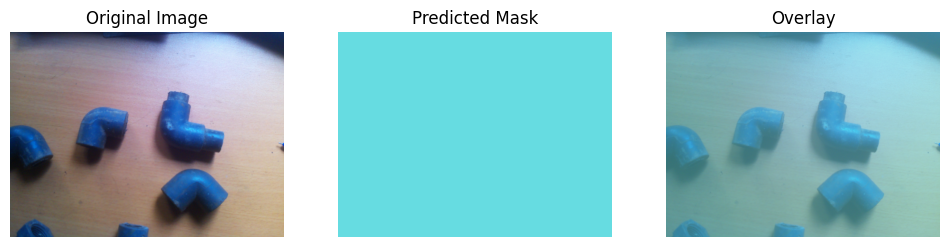

In [19]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# Configuration
NUM_CLASSES = 2
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
MODEL_PATH = "./model/deeplabv3_final.pth"

# Load your trained model
model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=False, num_classes=NUM_CLASSES)
model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
model.to(DEVICE)
model.eval()

# Image preprocessing (match training)
preprocess = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)  # create mini-batch (1, 3, H, W)
    return image, input_batch.to(DEVICE)

# Predict segmentation mask
def predict(image_path):
    orig_image, input_batch = load_image(image_path)

    with torch.no_grad():
        output = model(input_batch)['out']  # shape: (1, NUM_CLASSES, H, W)
        output = torch.nn.functional.interpolate(output, size=orig_image.size[::-1], mode='bilinear', align_corners=False)
        pred_mask = output.argmax(1).squeeze(0).cpu().byte().numpy()  # (H, W) class indices

    return orig_image, pred_mask

# Color palette for visualization (random distinct colors for each class)
def create_color_palette(num_classes):
    np.random.seed(42)
    palette = np.random.randint(0, 255, size=(num_classes, 3), dtype=np.uint8)
    return palette

# Visualize original image and predicted mask overlay
def visualize_prediction(image, mask, palette):
    mask_color = palette[mask]
    mask_img = Image.fromarray(mask_color).convert("RGBA")
    image = image.convert("RGBA")

    blended = Image.blend(image, mask_img, alpha=0.5)

    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.axis('off')
    plt.imshow(image)

    plt.subplot(1,3,2)
    plt.title("Predicted Mask")
    plt.axis('off')
    plt.imshow(mask_color)

    plt.subplot(1,3,3)
    plt.title("Overlay")
    plt.axis('off')
    plt.imshow(blended)

    plt.show()

# Example usage
test_image_path = "./MaskedImages/image_20250321_144934_lbent_1.png"  # replace with your test image path
orig_img, predicted_mask = predict(test_image_path)
palette = create_color_palette(NUM_CLASSES)
visualize_prediction(orig_img, predicted_mask, palette)


C:\Users\nadha\AppData\Local\Temp\ipykernel_27480\2530172508.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH, map_location=D

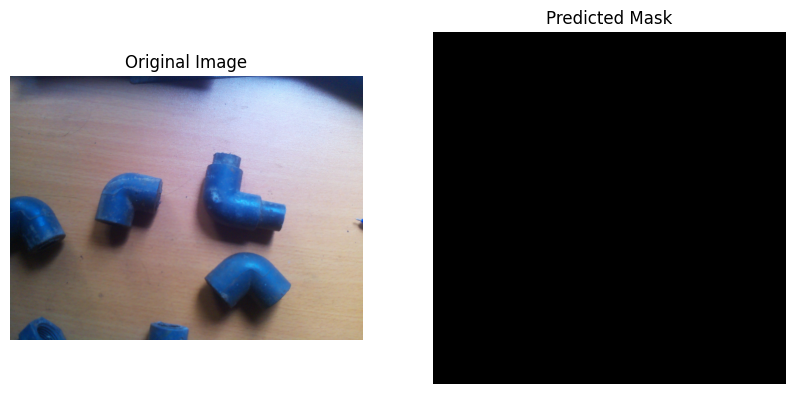

In [9]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Configuration
NUM_CLASSES = 2
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
MODEL_PATH = "./model/deeplabv3_final.pth"

# Load your trained model
model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=False, num_classes=NUM_CLASSES)
model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
model.to(DEVICE)
model.eval()

# Preprocessing
preprocess = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

def predict(image_path):
    image = Image.open(image_path).convert('RGB')
    input_tensor = preprocess(image).unsqueeze(0)  # batch dim

    with torch.no_grad():
        output = model(input_tensor)['out']  # shape [1, 2, H, W]
        pred_mask = torch.argmax(output.squeeze(0), dim=0).cpu().numpy()  # shape [H, W]

    return image, pred_mask

def visualize(image, mask):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.show()

# Usage
img_path = "./MaskedImages/image_20250321_144934_lbent_1.png"  # replace with your test image path
image, mask = predict(img_path)
visualize(image, mask)
